In [7]:
import cv2 as cv
import tensorflow as tf
import numpy as np
import scipy, os, sys, time, functools
from scipy import signal
from functools import reduce
import matplotlib.pylab as plt
gray_ = 'gray'

In [24]:
img = cv.imread('./image.jpg', 0)

In [81]:
def plot_n(imgs, infos=None):
    m = len(imgs)
    if infos is None:infos=["" for i in range(m)]
    if m == 1:
        f = plt.figure(figsize=(8, 8))
        plt.imshow(imgs[0], cmap=gray_)
        plt.title(infos[0])
        plt.axis('off')
    elif m == 4:
        f = plt.figure(figsize=(18, 18))
        f.subplots_adjust(wspace=0.1)
        for i in range(4):
            ax = f.add_subplot(2,2,i+1, title=infos[i])
            ax.axis('off')
            ax.imshow(imgs[i], cmap='gray')
    elif m < 4:
        f = plt.figure(figsize=(18, 18))
        f.subplots_adjust(wspace=0.1)
        for i in range(m):
            ax = f.add_subplot(1,m,i+1, title=infos[i])
            ax.axis('off')
            ax.imshow(imgs[i], cmap='gray')
    else:
        print('!!!!!!!')  
    plt.show()

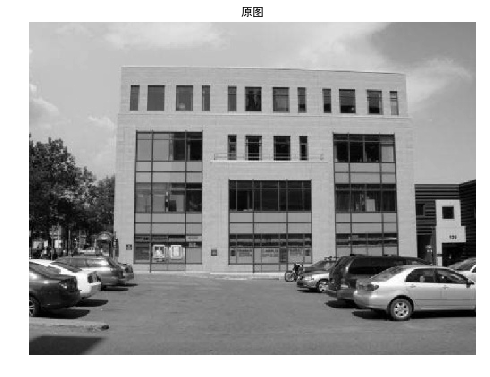

In [82]:
plot_n([img], ['原图'])

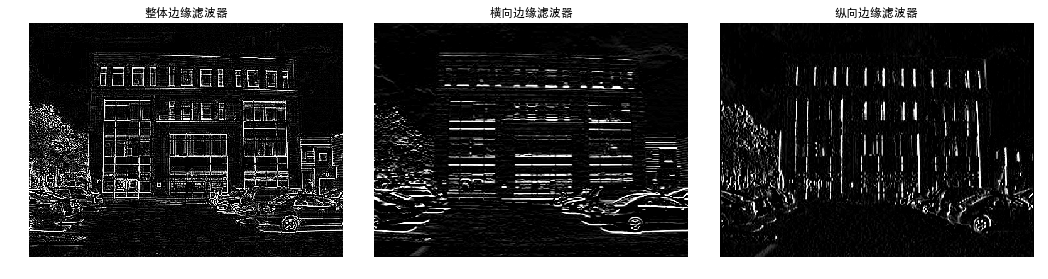

In [90]:
Ke = np.array([
    [0, -4, 0],
    [-4, 16, -4],
    [0, -4, 0]
])
Kh = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
Kv = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
plot_n([cv.filter2D(img, -1, -Ke),cv.filter2D(img, -1, -Kh),cv.filter2D(img, -1, -Kv)],
      ['整体边缘滤波器', '横向边缘滤波器', '纵向边缘滤波器'])

汇合操作降采样， 相当于用$p-$范数作为非线性映射的“卷积”，当$p$趋于正无穷时就是常见的最大值汇合。  
汇合层通常有三种功效：  
1. 特征不变形($\mathrm{feature\ invariant}$)    
2. 特征降维，维数约减